In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline



In [8]:
mx = [39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25]
mn = [21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18]
y = [1, 2,3, 4, 5, 6, 7, 8, 9, 10, 11, 12]



In [9]:
df = pd.DataFrame(list(zip(mx, mn,y)), columns=["max","min","month"])
df.head(10)

,max,min,month
0,39,21,1
1,41,23,2
2,43,27,3
3,47,28,4
4,49,32,5
5,51,35,6
6,45,31,7
7,38,28,8
8,37,21,9
9,29,19,10


In [10]:

from scipy import optimize

def yearly_temps(times, avg, ampl, time_offset):
    return (avg
            + ampl * np.cos((times + time_offset) * 2 * np.pi / times.max()))

r_max, c_max = optimize.curve_fit(yearly_temps, df["month"], df["max"], [20, 10, 0])
r_min, c_min = optimize.curve_fit(yearly_temps, df["month"], df["min"], [-40, 20, 0])

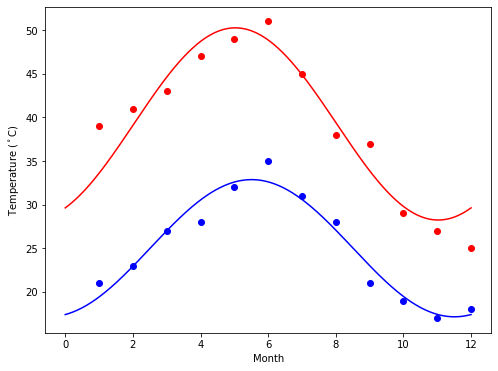

In [11]:
days = np.linspace(0, 12, num=365)

plt.figure(figsize=(8,6))
plt.plot(df["month"], df["max"], 'ro')
plt.plot(days, yearly_temps(days, *r_max), 'r-')
plt.plot(df["month"], df["min"], 'bo')
plt.plot(days, yearly_temps(days, *r_min), 'b-')
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')

plt.show()

In [6]:
url = "https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv"

In [13]:
tit = pd.read_csv(url)a

In [15]:
tit.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


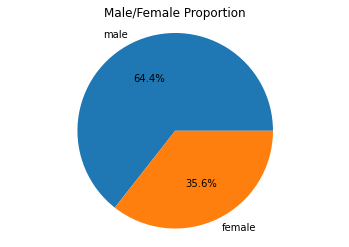

In [51]:
plt.pie(tit["sex"].value_counts(),labels=["male","female"],autopct='%1.1f%%')
plt.title('Male/Female Proportion')
plt.axis('equal')
plt.show()


In [62]:

mapp = {"male":0,"female":1}
gender = tit["sex"].map(mapp)
gender


0       1.0
1       0.0
2       1.0
3       0.0
4       1.0
       ... 
1305    1.0
1306    0.0
1307    0.0
1308    0.0
1309    NaN
Name: sex, Length: 1310, dtype: float64

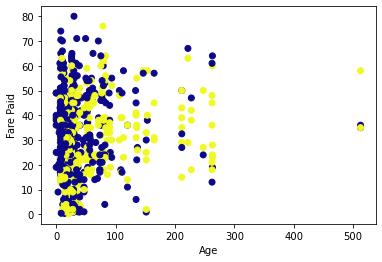

In [71]:
plt.scatter(x=tit["fare"],y=tit["age"],c=gender,cmap='plasma')
plt.xlabel("Age")
plt.ylabel("Fare Paid")
plt.show()